# Outliers

### What is outlier?
    - The recorded data point that is away from the dataset's normal range.
    - Outlier stands out from the dataset.

### Reasons of Outlier:
    - Observation and data entry error.
    - Experimental error or machinery fault.
    - Data processing error.
    - Data corruption or presence of missing values.
    - An actual rare fact that is unusual in comparison to normal values.

### Visualizing Outlier:
    - Statistically Z-Score and Inter Quartile Range(IQR), Distribution curve can be used to visualize the outliers
    - Box plot, Histograms, and Scatter plots are useful to check outliers.

### Treatment of Outliers:
    - Remove the outliers by dropping the rows
    - Transform the dataset
        - Square root transformation
        - Cube root transformation
        - Log transformation
    - Imputation techniques


In [44]:
# Import basic libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['font.size']=14
plt.rcParams['figure.facecolor']='w'
sns.set_style('darkgrid')

### Checking for outliers

In [83]:
df = pd.read_csv('Glass-dataset.csv')

df.head()

,A,B,C,D,E,F,G,H,outlier
0,0.467651,0.321584,0.768880,0.246630,0.838799,0.099737,0.298340,1,no
1,0.496412,0.220491,0.776032,0.316598,0.919973,0.089145,0.279479,2,no
2,0.519133,0.404464,0.768012,0.334978,0.801622,0.092369,0.271238,3,no
3,0.199650,0.547373,0.374284,0.362223,0.817017,0.000000,0.177913,4,yes
4,0.847261,0.286361,0.000000,0.217792,0.000000,0.019135,1.000000,5,no


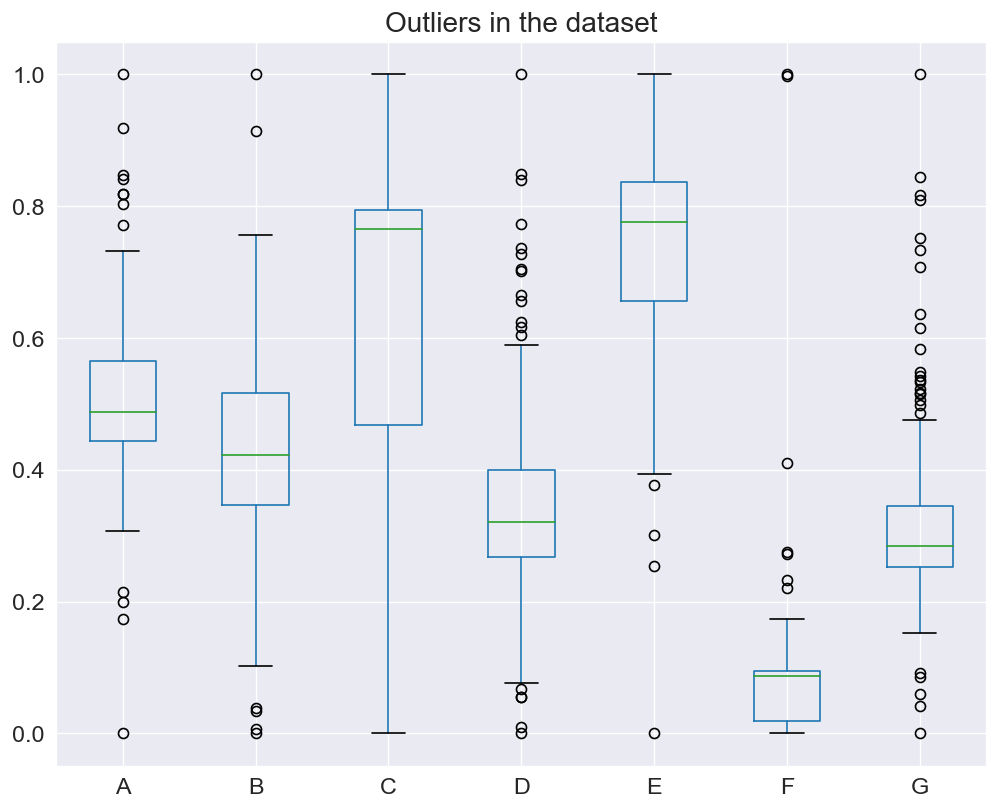

In [84]:
# Checking for outliers

df.boxplot(
    column=df.columns[:7].tolist()
)
plt.title('Outliers in the dataset')
plt.show()

- All the numerical columns have outliers except the 'C'.


#### Dropping the outliers.
    - The E column has less outliers we can drop them.
    - Before dropping the outliers make sure they don't affect the study much.
    - For dropping outliers we will find the mean and standard deviation of that column then drop the rows that are beyond limit. 

In [85]:
df.E.max()

1.0

In [86]:
df.E.min()

0.0

In [87]:
df.E.mean() + df.E.std()*2, df.E.mean()-df.E.std()*2



(1.0112550488238081, 0.45565260538179925)

In [88]:
# mean and std of the column
E_mean, E_std = df.E.mean(), df.E.std()

# cut-off
cut_off = E_std * 5

# set limits
lower, upper = E_mean - cut_off, E_std+ cut_off

lower, upper

(0.03895077280029258, 0.8334036651630133)

In [89]:
# identifying outliers
outliers = [x for x in df.E if x< lower or x> upper]

len(outliers)

56

In [90]:
print('Before dropping outliers, the length of the column is:', df.E.shape[0])

# remove outliers

outliers_removed = [x for x in df.E if x>lower and x< upper]

print('After removing the outliers', len(outliers_removed))

Before dropping outliers, the length of the column is: 214
After removing the outliers 158


- Dropping outliers might not be effect in randomly picked data set.
- Drop if you are familiar with the dataset. Otherwise it will be very time taking.
- IQR treatment is similar to previous technique.
- These methods are not good with some data sets.

#### IQR 

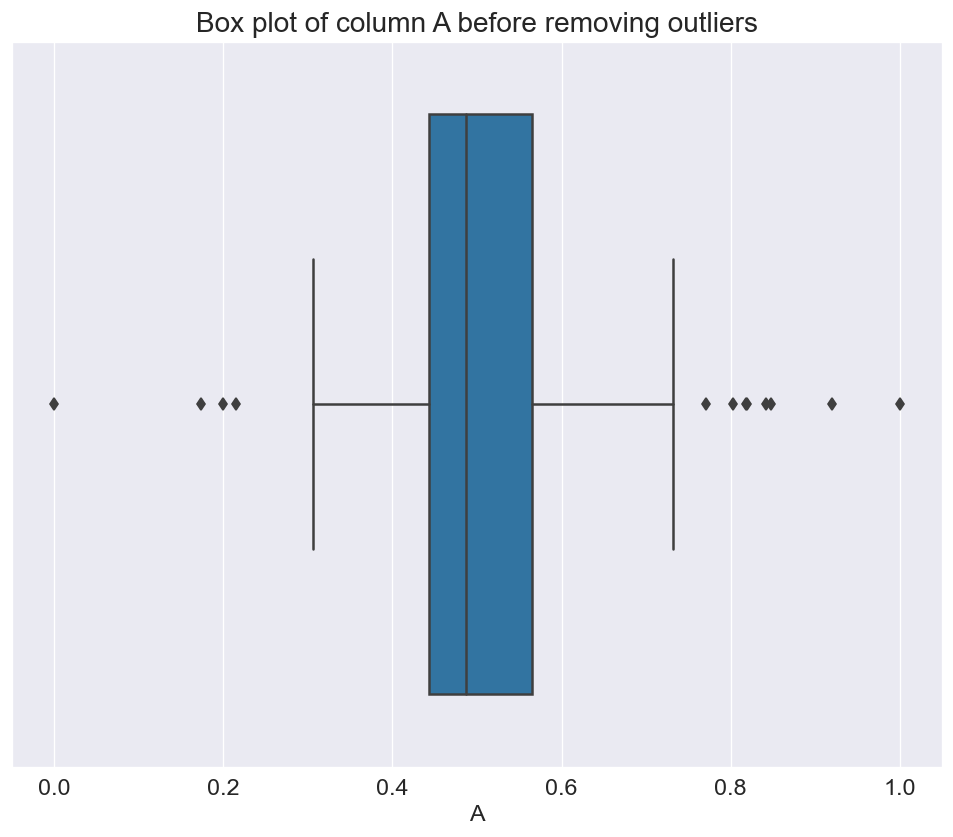

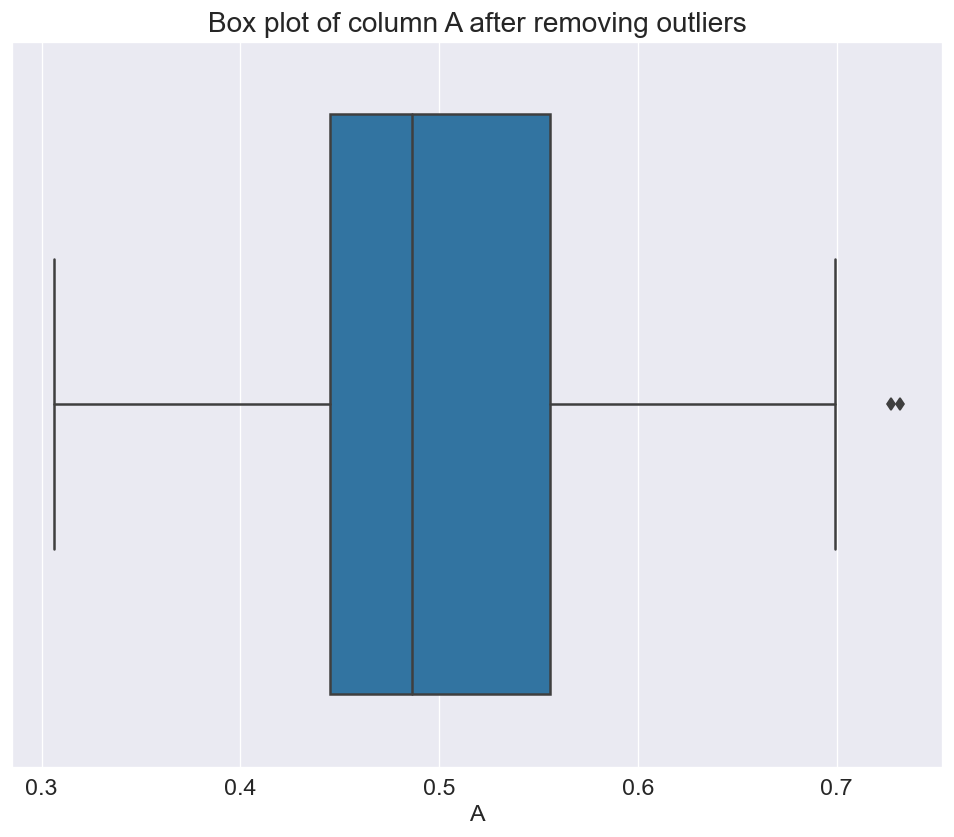

In [91]:
sns.boxplot(df['A'])
plt.title('Box plot of column A before removing outliers')
plt.show()


def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name]<(np.percentile(df[field_name], 25)-iqr)].index, inplace=True)


drop_outliers(df, 'A')

sns.boxplot(df.A)
plt.title('Box plot of column A after removing outliers')
plt.show()

### Transforming Values

#### 1. Square root Transformation

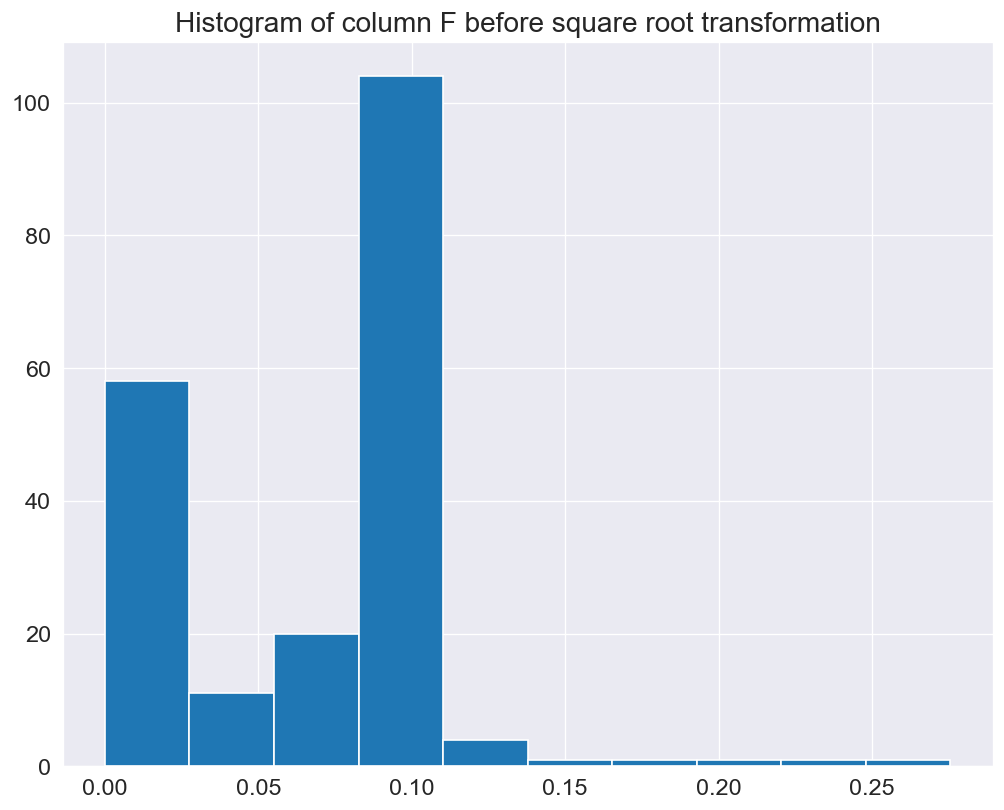

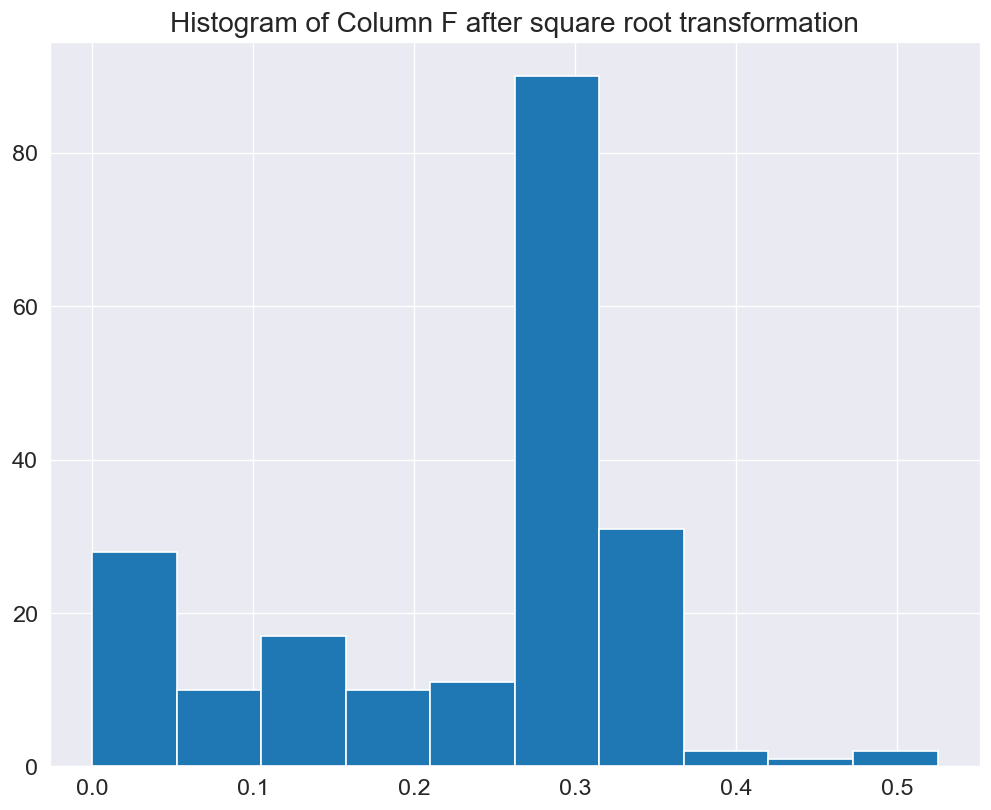

In [92]:
plt.hist(df.F)
plt.title('Histogram of column F before square root transformation')
plt.show()

df.F = df.F**0.5

plt.hist(df.F)
plt.title('Histogram of Column F after square root transformation')
plt.show()

#### 2. Cube root Transformation


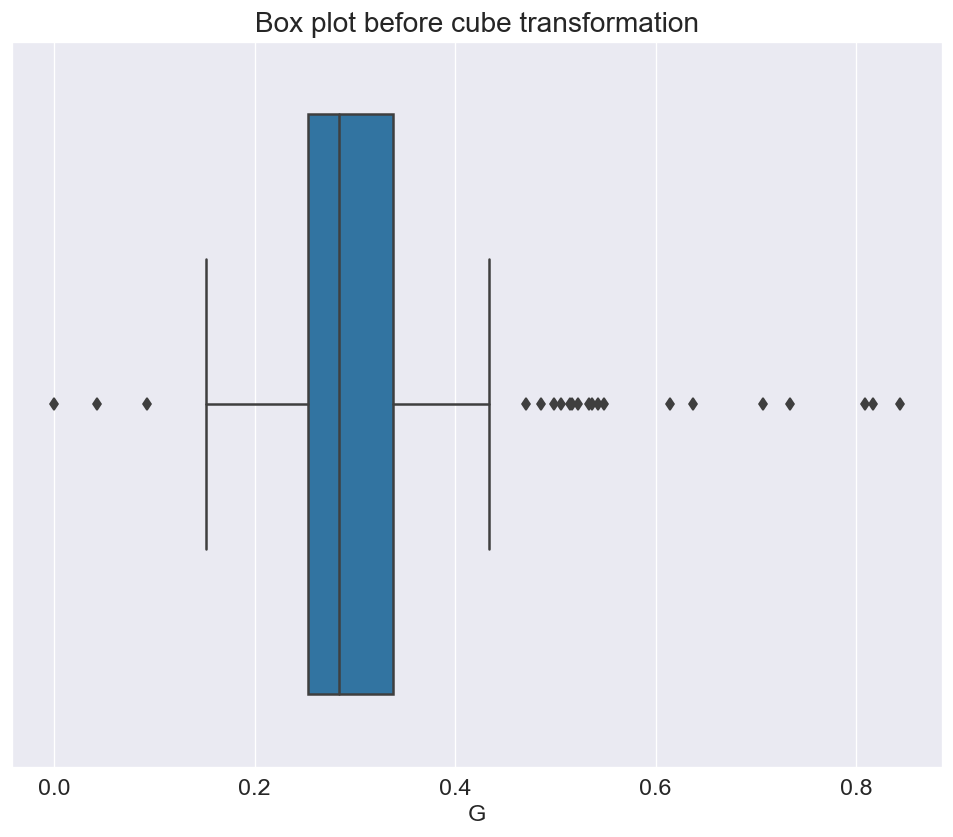

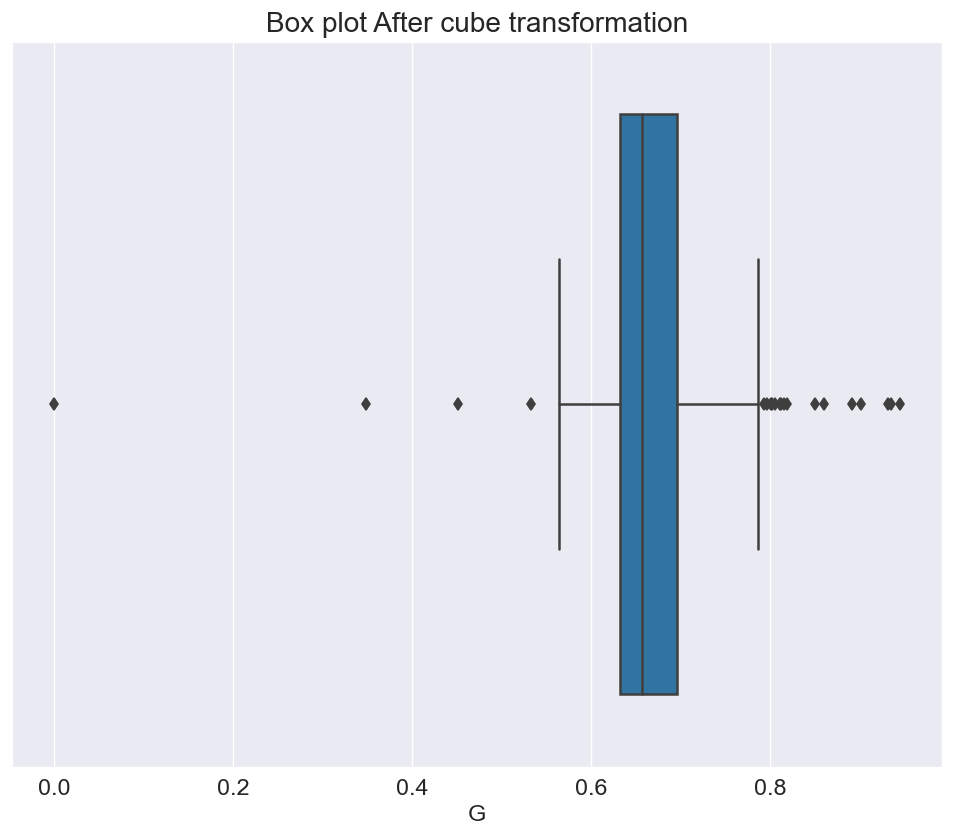

In [93]:
sns.boxplot(df.G)
plt.title('Box plot before cube transformation')
plt.show()

df.G = df.G ** (1/3)

sns.boxplot(df.G)
plt.title('Box plot After cube transformation')
plt.show()

#### 3. Log transformation

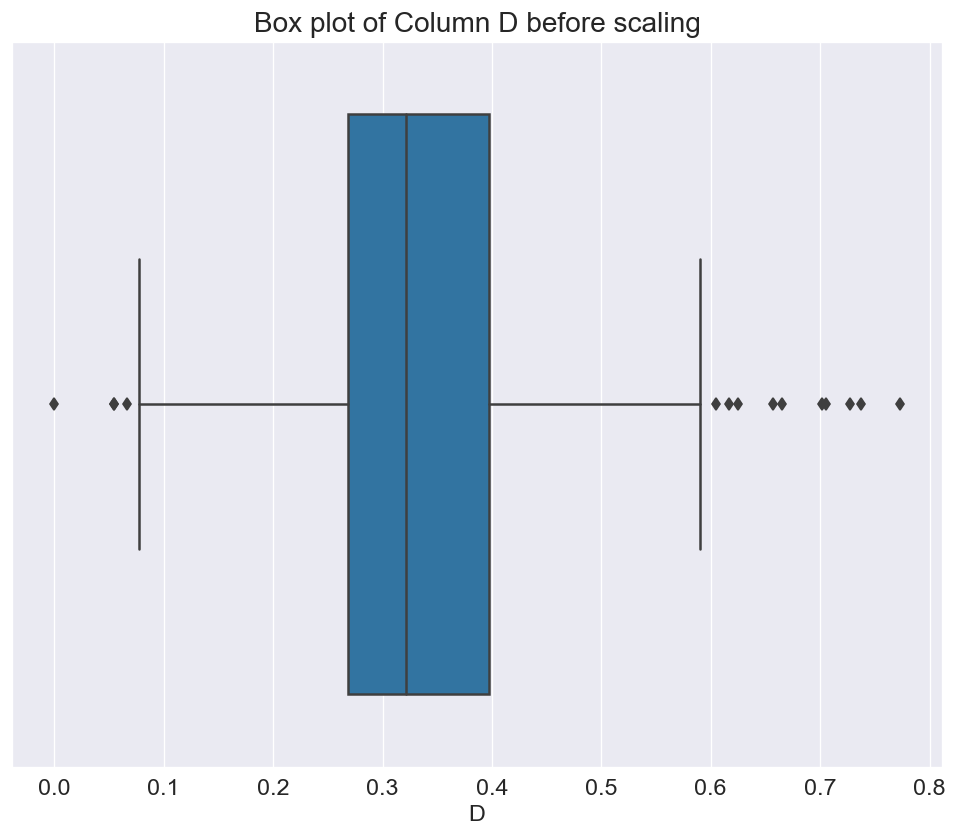

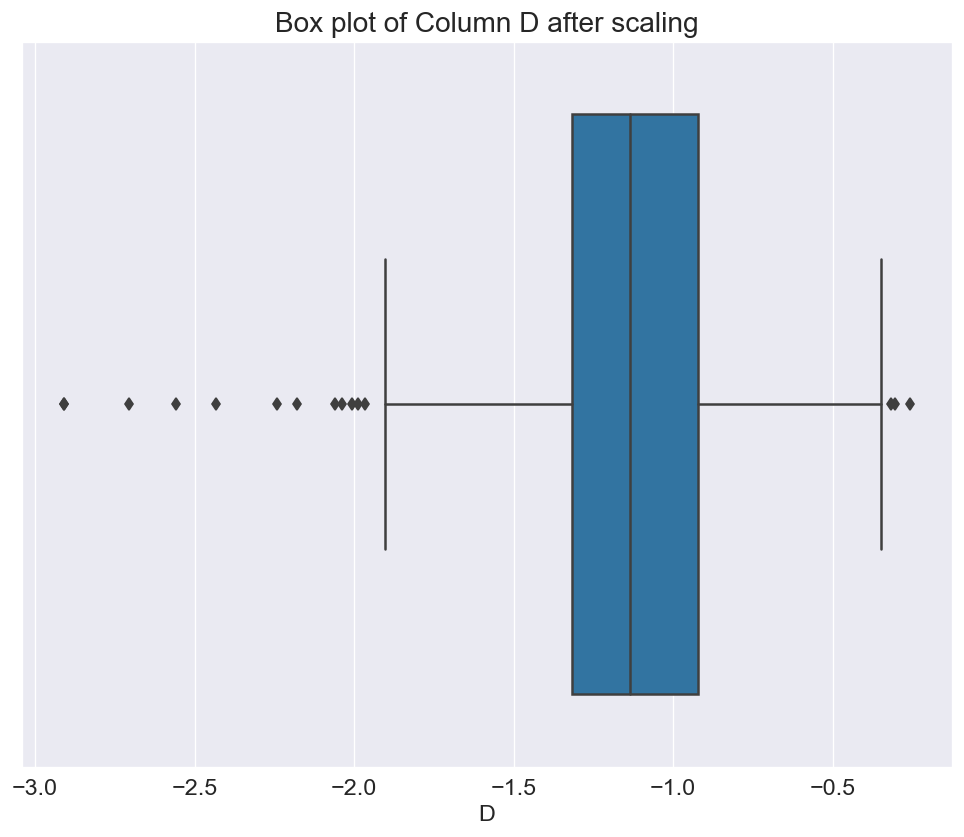

In [94]:
sns.boxplot(df.D)
plt.title('Box plot of Column D before scaling')
plt.show()

df.D = np.log(df.D)

sns.boxplot(df.D)
plt.title('Box plot of Column D after scaling')
plt.show()

In [95]:
df.G.replace(0, df.G.std(), inplace=True)

#### 4. BoxCox Transformation


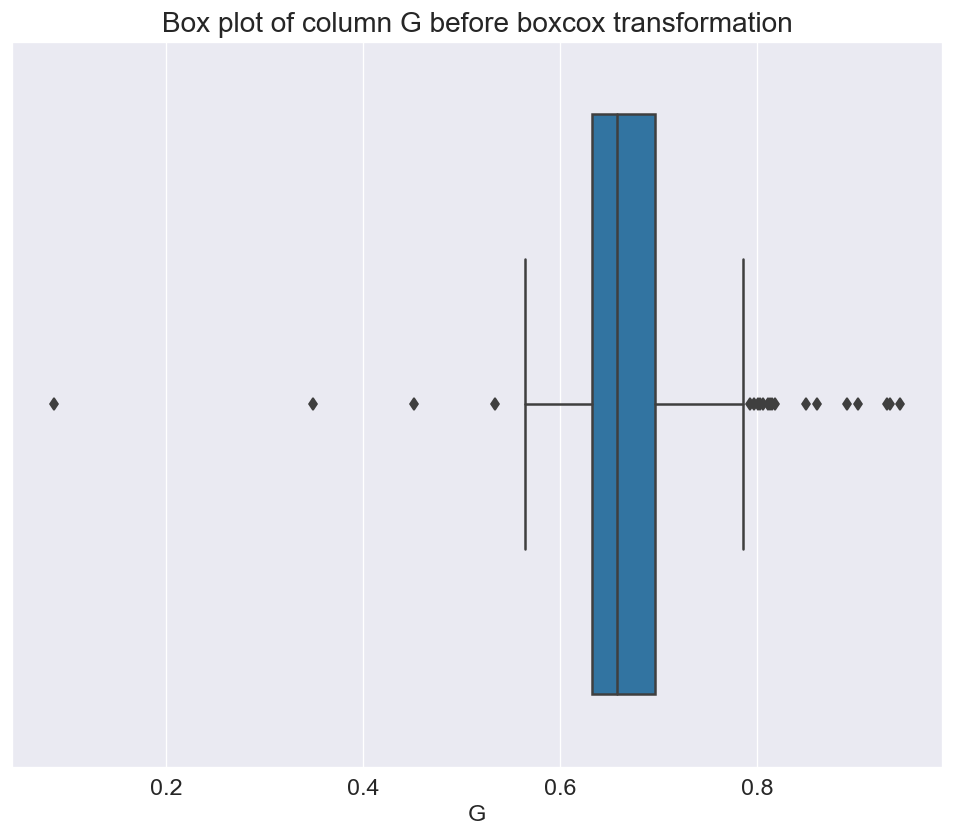

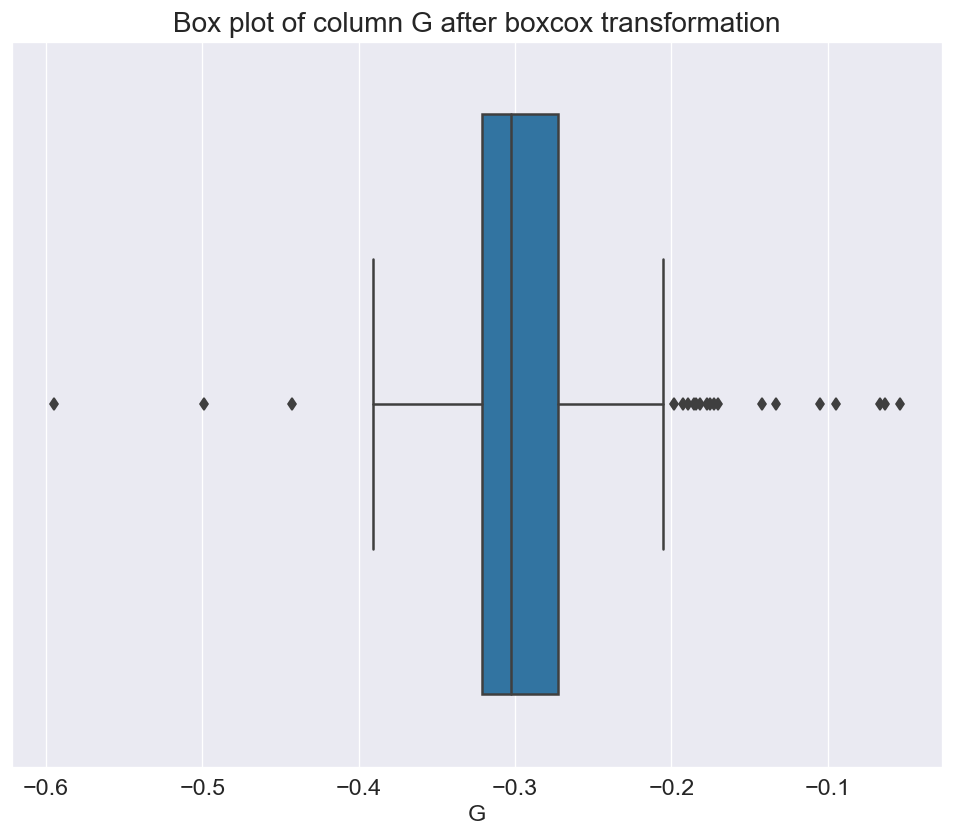

In [96]:
# import necessary module
from scipy import stats

sns.boxplot(df.G)
plt.title('Box plot of column G before boxcox transformation')
plt.show()

df.G, fitted_lambda = stats.boxcox(df.G, lmbda=None)

sns.boxplot(df.G)
plt.title('Box plot of column G after boxcox transformation')
plt.show()

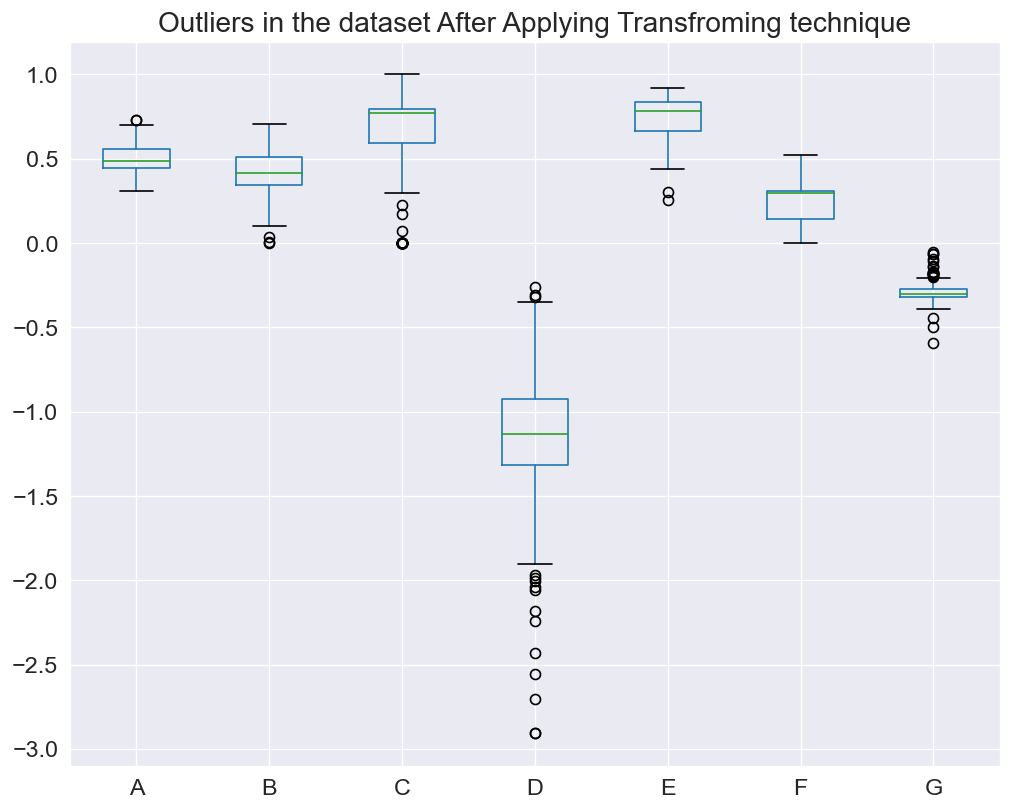

In [97]:

df.boxplot(
    column=df.columns[:7].tolist()
)
plt.title('Outliers in the dataset After Applying Transfroming technique')
plt.show()

### Imputation Technique

In [82]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 120


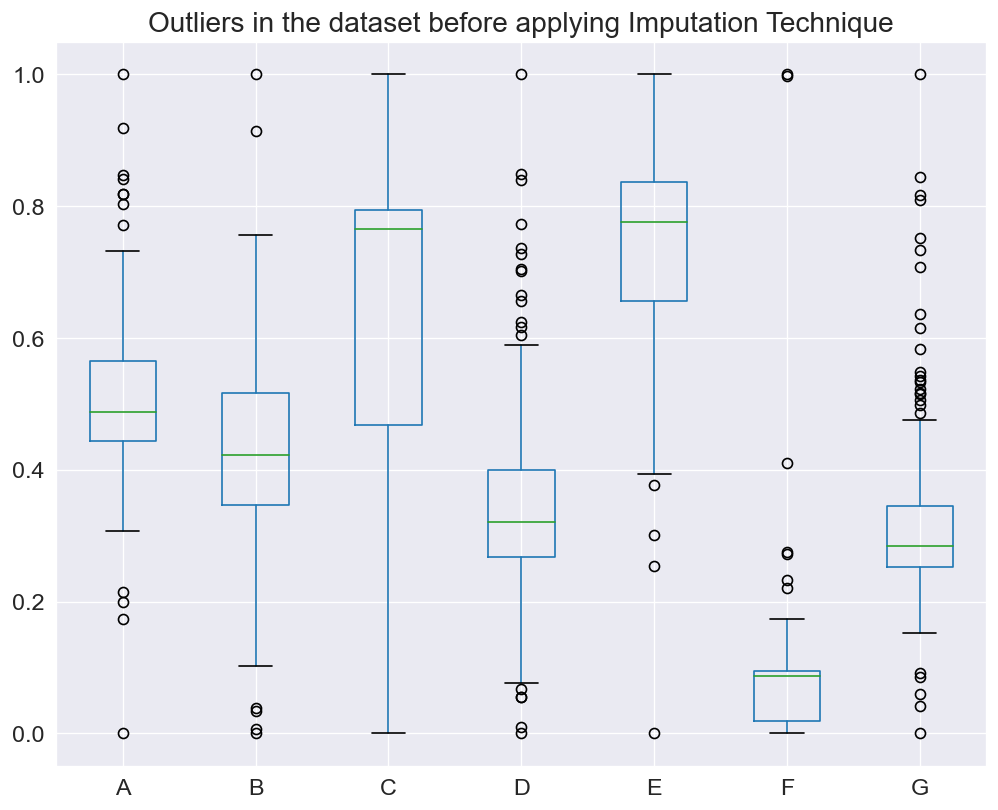

In [105]:
df = pd.read_csv('Glass-dataset.csv')


df.boxplot(
    column=df.columns[:7].tolist()
)
plt.title('Outliers in the dataset before applying Imputation Technique')
plt.show()

#### 1. Mean Imputation


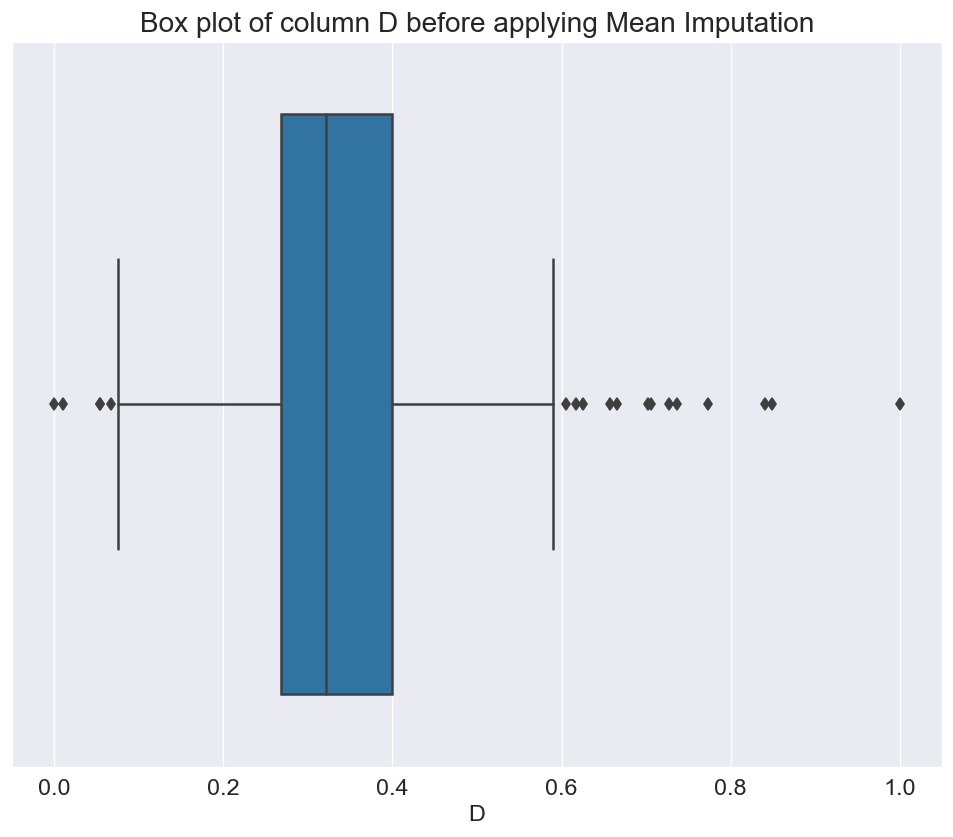

Text(0.5, 1.0, 'Box plot of column D after applying Mean Imputation')

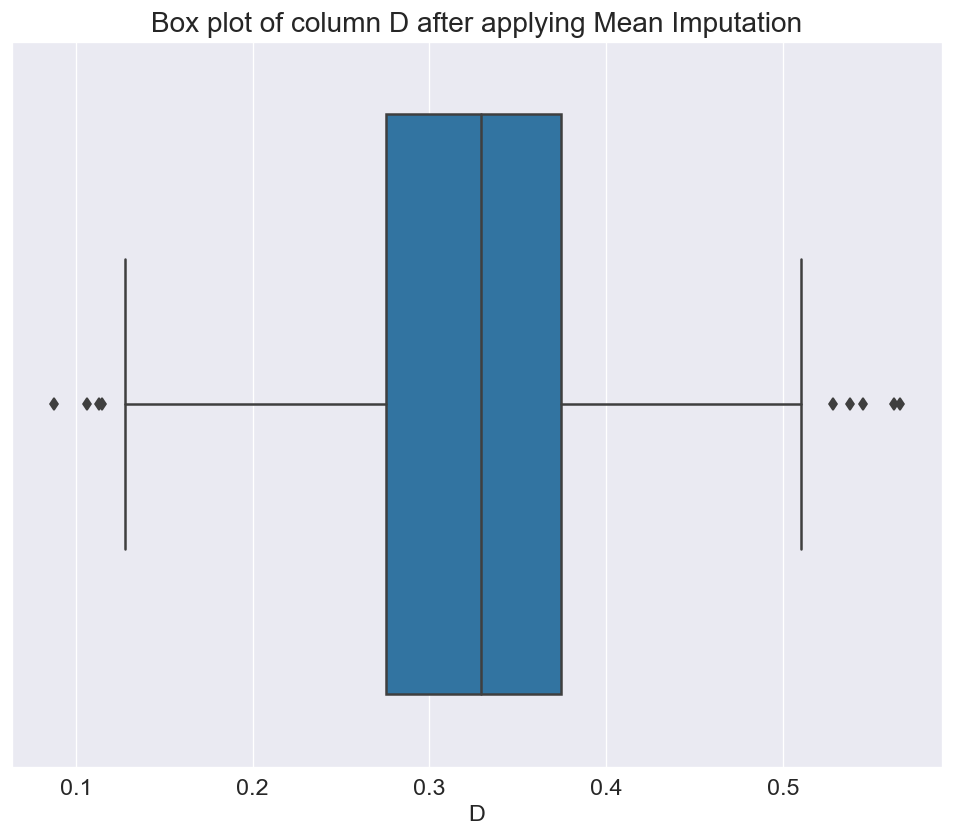

In [106]:
sns.boxplot(df.D)
plt.title('Box plot of column D before applying Mean Imputation')
plt.show()

for i in df.D:
    q1 = df.D.quantile(0.25)
    q3 = df.D.quantile(0.75)

    iqr = q3 - q1

    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    if i > upper_limit or i < lower_limit:
        df.D = df.D.replace(i, np.mean(df.D))


sns.boxplot(df.D)
plt.title('Box plot of column D after applying Mean Imputation')

#### 2. Median Imputation


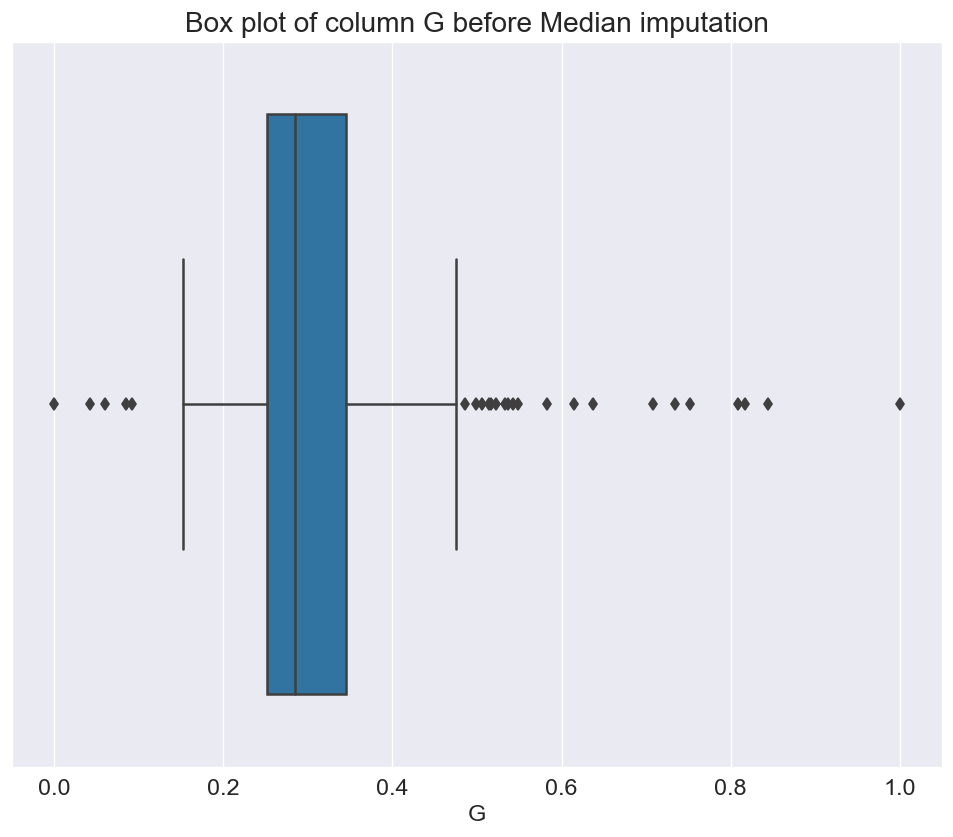

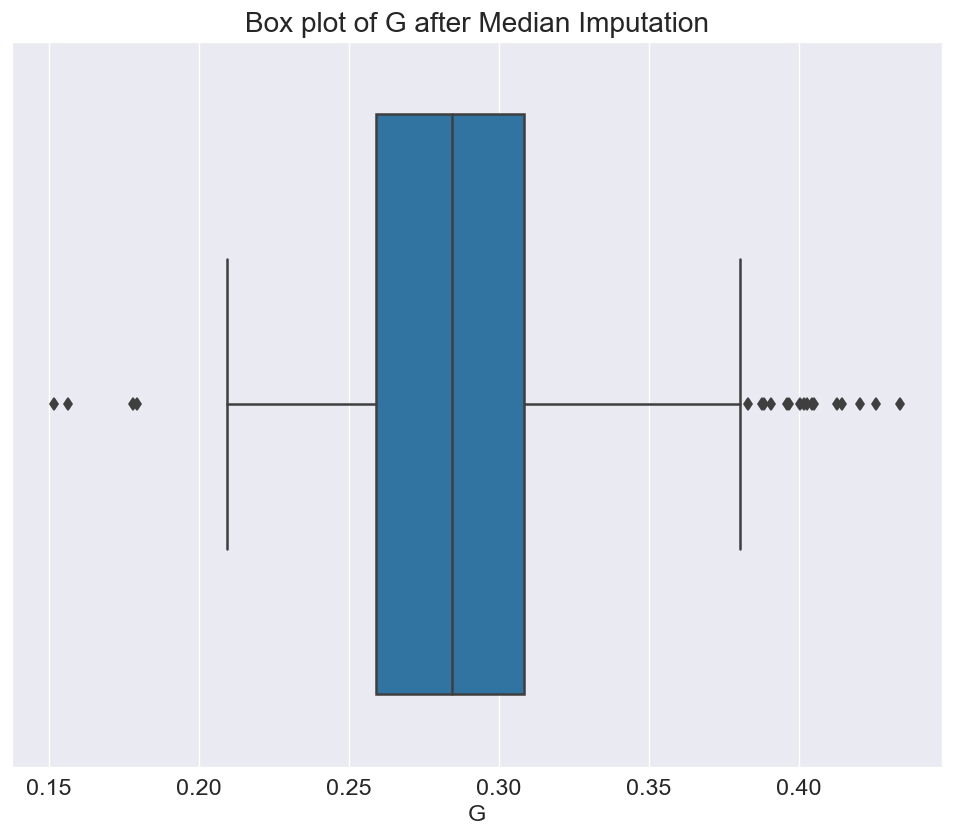

In [107]:
sns.boxplot(df.G)
plt.title('Box plot of column G before Median imputation')
plt.show()

for i in df.G:
    # Q1 and Q3
    q1 = df.G.quantile(0.25)
    q3 = df.G.quantile(0.75)

    # iqr range
    iqr = q3 - q1

    # set limits
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr

    # imputation 
    if i>upper_limit or i < lower_limit:
        df.G = df.G.replace(i, df.G.median())


sns.boxplot(df.G)
plt.title('Box plot of G after Median Imputation')
plt.show()

#### 3. Zero value Imputation

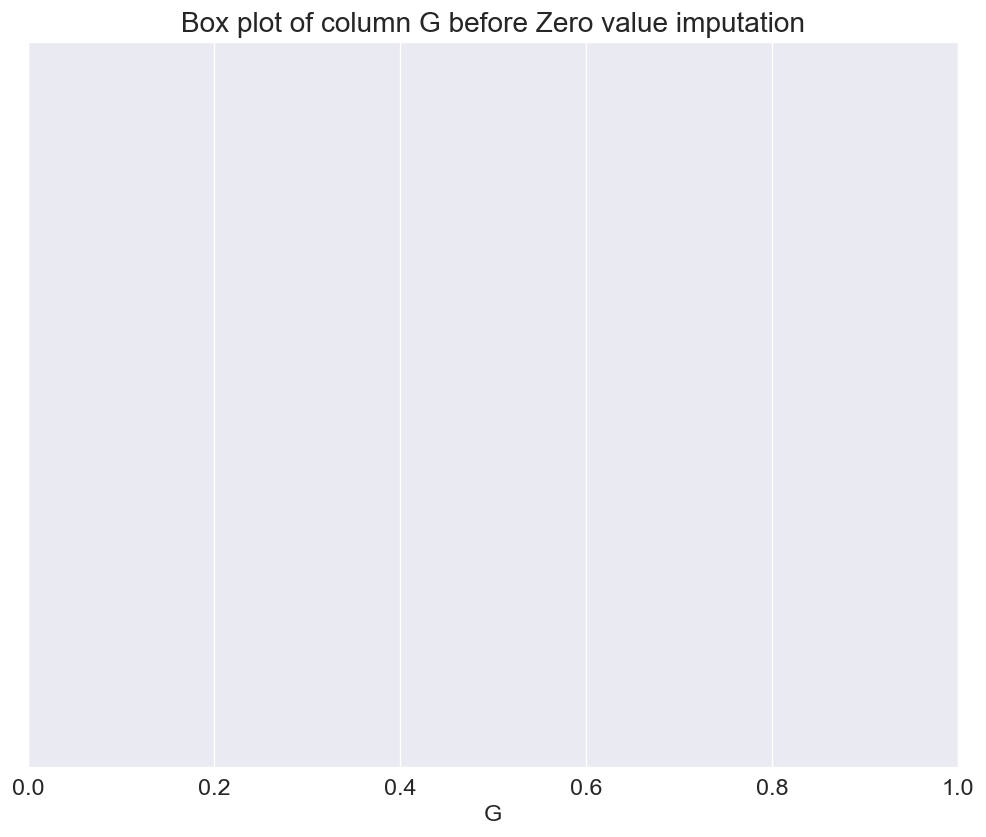

TypeError: '>' not supported between instances of 'NoneType' and 'float'

In [112]:
sns.boxplot(df.G)
plt.title('Box plot of column G before Zero value imputation')
plt.show()

for i in df.G:
    # Q1 and Q3
    q1 = df.G.quantile(0.25)
    q3 = df.G.quantile(0.75)

    # iqr range
    iqr = q3 - q1

    # set limits
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr

    # imputation 
    if i>upper_limit or i < lower_limit:
        df.G = df.G.replace(i,0)


sns.boxplot(df.G)
plt.title('Box plot of G after Zero value Imputation')
plt.show()

## Conclusion

---

Outliers can arise due to many regions and they affect the analysis effectively. Outliers biases the mean. There are various techniques are present for outlier detection i.e. Hypothesis testing(Grubbs test), IQR method, Z-score and robust Z-score, Isolation Forest, and visualizing technique like scatter plot, histograms, qq plot, and box plots. Outliers can be treated based on their appearance. some popular techniques are deletion, transformation, imputation and even they can be separately dealt as per requirement.

## Reference:
- [Data Cleaning Challenges: Outliers](https://www.kaggle.com/rtatman/data-cleaning-challenge-outliers)
- [How to Remove Outliers for Machine Learning](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
- [What are outliers and how to treat them in Data Analytics?](https://www.aquare.la/en/what-are-outliers-and-how-to-treat-them-in-data-analytics/)
- [What are outliers in the data?](https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm)
- [Python Treatment for Outliers in Data Science](https://www.analyticsvidhya.com/blog/2021/03/zooming-out-a-look-at-outlier-and-how-to-deal-with-them-indata-science/)
- [Outlier!!! The Silent Killer](https://www.kaggle.com/nareshbhat/outlier-the-silent-killer)

### Dataset:
- [Kaggle](https://www.kaggle.com/general/171508)

